In [43]:
import PyPDF2 # pip install PyPDF2 | Read pdf
from tabula import read_pdf # pip install tabula-py | Read tables from pdf

import docx # pip install python-docx | Read Word files
from docx import Document #for exporting

import numpy as np
import pandas as pd
import re # regex

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# PDF

In [2]:
pdfobj = open('demo.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfobj)

In [3]:
pdfReader.numPages

2

In [4]:
pageObj = pdfReader.getPage(0) #1st page is 0

In [5]:
pageObj.extractText() #\n is the next line

'Demo\n \nDistributed Artificial Intelligence (DAI) has existed as a subfield of AI for less than two \ndecades. DAI is concerned with systems that consist of multiple independent entities that \ninteract in a domain. Traditionally, DAI has been divided into two sub\n-\ndis\nciplines: \nDistributed Problem Solving (DPS) focuses on the information management aspects of \nsystems with several components working together towards a common goal; Multiagent \nSystems (MAS) deals with behavior management in collections of several independe\nnt \nentities, or agents. This survey of MAS is intended to serve as an introduction to the field and \nas an organizational framework. A series of general multiagent scenarios are presented. For \neach scenario, the issues that arise are described along with a \nsampling of the techniques that \nexist to deal with them. The presented techniques are not exhaustive, but they highlight how \nmultiagent systems can be and have been used to build complex syste

# Get All Text

In [6]:
all_text = ""
for page in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(page)
    text = pageObj.extractText()
    all_text = all_text + " " + text

In [7]:
all_text

' Demo\n \nDistributed Artificial Intelligence (DAI) has existed as a subfield of AI for less than two \ndecades. DAI is concerned with systems that consist of multiple independent entities that \ninteract in a domain. Traditionally, DAI has been divided into two sub\n-\ndis\nciplines: \nDistributed Problem Solving (DPS) focuses on the information management aspects of \nsystems with several components working together towards a common goal; Multiagent \nSystems (MAS) deals with behavior management in collections of several independe\nnt \nentities, or agents. This survey of MAS is intended to serve as an introduction to the field and \nas an organizational framework. A series of general multiagent scenarios are presented. For \neach scenario, the issues that arise are described along with a \nsampling of the techniques that \nexist to deal with them. The presented techniques are not exhaustive, but they highlight how \nmultiagent systems can be and have been used to build complex syst

In [8]:
# Remove /n
all_text = all_text.replace('\n', '').replace('.', '').replace(',', '').replace(';', '')
all_text

' Demo Distributed Artificial Intelligence (DAI) has existed as a subfield of AI for less than two decades DAI is concerned with systems that consist of multiple independent entities that interact in a domain Traditionally DAI has been divided into two sub-disciplines: Distributed Problem Solving (DPS) focuses on the information management aspects of systems with several components working together towards a common goal Multiagent Systems (MAS) deals with behavior management in collections of several independent entities or agents This survey of MAS is intended to serve as an introduction to the field and as an organizational framework A series of general multiagent scenarios are presented For each scenario the issues that arise are described along with a sampling of the techniques that exist to deal with them The presented techniques are not exhaustive but they highlight how multiagent systems can be and have been used to build complex systems When options exist the techniques present

In [9]:
# Remove duplicate spaces
all_text = re.sub(' +', ' ', all_text)
all_text

' Demo Distributed Artificial Intelligence (DAI) has existed as a subfield of AI for less than two decades DAI is concerned with systems that consist of multiple independent entities that interact in a domain Traditionally DAI has been divided into two sub-disciplines: Distributed Problem Solving (DPS) focuses on the information management aspects of systems with several components working together towards a common goal Multiagent Systems (MAS) deals with behavior management in collections of several independent entities or agents This survey of MAS is intended to serve as an introduction to the field and as an organizational framework A series of general multiagent scenarios are presented For each scenario the issues that arise are described along with a sampling of the techniques that exist to deal with them The presented techniques are not exhaustive but they highlight how multiagent systems can be and have been used to build complex systems When options exist the techniques present

In [10]:
all_text = all_text.strip() # strip left and right spaces
all_text

'Demo Distributed Artificial Intelligence (DAI) has existed as a subfield of AI for less than two decades DAI is concerned with systems that consist of multiple independent entities that interact in a domain Traditionally DAI has been divided into two sub-disciplines: Distributed Problem Solving (DPS) focuses on the information management aspects of systems with several components working together towards a common goal Multiagent Systems (MAS) deals with behavior management in collections of several independent entities or agents This survey of MAS is intended to serve as an introduction to the field and as an organizational framework A series of general multiagent scenarios are presented For each scenario the issues that arise are described along with a sampling of the techniques that exist to deal with them The presented techniques are not exhaustive but they highlight how multiagent systems can be and have been used to build complex systems When options exist the techniques presente

# WordCloud

In [45]:
all_text = all_text.split(' ') #split using space and put it in a list
all_text

['Demo',
 'Distributed',
 'Artificial',
 'Intelligence',
 '(DAI)',
 'has',
 'existed',
 'as',
 'a',
 'subfield',
 'of',
 'AI',
 'for',
 'less',
 'than',
 'two',
 'decades',
 'DAI',
 'is',
 'concerned',
 'with',
 'systems',
 'that',
 'consist',
 'of',
 'multiple',
 'independent',
 'entities',
 'that',
 'interact',
 'in',
 'a',
 'domain',
 'Traditionally',
 'DAI',
 'has',
 'been',
 'divided',
 'into',
 'two',
 'sub-disciplines:',
 'Distributed',
 'Problem',
 'Solving',
 '(DPS)',
 'focuses',
 'on',
 'the',
 'information',
 'management',
 'aspects',
 'of',
 'systems',
 'with',
 'several',
 'components',
 'working',
 'together',
 'towards',
 'a',
 'common',
 'goal',
 'Multiagent',
 'Systems',
 '(MAS)',
 'deals',
 'with',
 'behavior',
 'management',
 'in',
 'collections',
 'of',
 'several',
 'independent',
 'entities',
 'or',
 'agents',
 'This',
 'survey',
 'of',
 'MAS',
 'is',
 'intended',
 'to',
 'serve',
 'as',
 'an',
 'introduction',
 'to',
 'the',
 'field',
 'and',
 'as',
 'an',
 'organ

In [33]:
wordcloud = WordCloud(stopwords = STOPWORDS, 
                      background_color = 'black', 
                      width = 1000, height = 500).generate(' '.join(all_text))

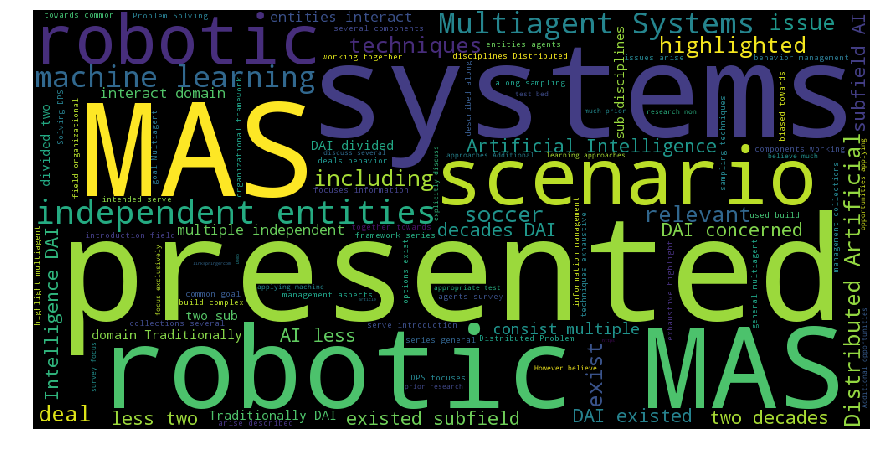

In [34]:
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

# Using Tabula

In [197]:
#encoding utf-8 default, cp1252 on windows | lattice of table with cells/borders
# Pages = 1 starts from 1st page of pdf
df = read_pdf('gwb.pdf', pages = 10, encoding = 'cp1252', lattice = True)
df.head()

,Sl.No.,District,Geographical area of the,Total No. of stations,No. of piezometers
0,1.0,Bagalkot,6575,2 6,1 2
1,2.0,Bangalore Rural,2208,13,7
2,3.0,Bangalore Urban,2259,30,20
3,4.0,Bellary,8450,45,13
4,5.0,Belgaum,13415,94,41


In [195]:
# Reading Multiple pages | 207 to 210 Or you can specify a list for specific number of pages [207,210]
df2 = read_pdf('gwb.pdf', pages = '207-210', encoding = 'cp1252', lattice = True)
df2.columns = ['Well_no', 'District', 'location', 'longitude', 'latitude', 'Depth_may-13', 'Depth_aug-13', 'Depth_nov-13', 'Depth_jan-13']
df2 = df2.iloc[1:,:]
df2.head()

,Well_no,District,location,longitude,latitude,Depth_may-13,Depth_aug-13,Depth_nov-13,Depth_jan-13
1,BAGPZ01,Bagalkot,Bagalkot,75.713,16.196,30.14,29.98,25.57,-
2,BIJPZ19,Bagalkot,Ilkal,76.11,15.968,6.37,-,-,-
3,BIJPZ27,Bagalkot,K.matti,75.578,16.131,-,23.86,-,-
4,BIJPZ21,Bagalkot,Kulgeri,75.508,15.908,-,-,7.87,-
5,BIJPZ30,Bagalkot,Lokapur,75.368,16.163,3.74,2.79,13.01,12.98


In [196]:
# Reading tables without cells/borders
df2 = read_pdf('gwb.pdf', pages = '93-94', encoding = 'cp1252', stream = True)
df2.columns = ['slno', 'well_no', 'district', 'village', 'taluk', 'toposheet', 'lat', 'lon', 'elevation', 'height', 'depth', 'geology']
df2.head()

,slno,well_no,district,village,taluk,toposheet,lat,lon,elevation,height,depth,geology
0,20,SW57H1C6,Bangalore,GOTTIGERE,BANGALORE SOUTH,57H/1C,"77°35'30""","12°51'30""",917.0,0.82,7.61,ALV
1,21,SW57H1C8,Bangalore,KAGIKLOIPNUDRAANAHALL,BANGALORE SOUTH,57H/1C,"77°13'10""","12°48'15""",NaN,0.90,20.74,GRT
2,22,SW57H1C12,Bangalore,Y,BANGALORE SOUTH,57H/1C,774130,125430,NaN,0.88,13.52,GRT
3,23,SW57H1B10,Bangalore,KENGERI,BANGALORE SOUTH,57H/1B,772900,125430,787.0,0.25,8.40,GRT
4,24,SW57H1D10,Bangalore,SAMETHANAHALLI,BANGALORE SOUTH,57H/1D,"77°45'50""","12°59'00""",NaN,0.80,NaN,GRT


# DOCX

In [20]:
doc = docx.Document('demo.docx')

In [21]:
len(doc.paragraphs)

11

In [22]:
doc.paragraphs[0].text

'Document Title'

In [23]:
doc.paragraphs[1].text

'A plain paragraph with some bold and some italic'

In [24]:
len(doc.paragraphs[1].runs)

4

In [25]:
doc.paragraphs[1].runs[0].text

'A plain paragraph with some '

# Get all Text

In [26]:
def getText(filename,):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [27]:
print(getText('demo.docx'))

Document Title
A plain paragraph with some bold and some italic
Heading, level 1
Intense quote
first item in unordered list
first item in ordered list

Rectified activation units (rectifiers) are essential for state-of-the-art neural networks. In his work, we study rectifier neural networks for image classification from two aspects. First, we propose a Parametric Rectified Linear Unit (PReLU) that generalizes the traditional rectified unit. PReLU improves model fitting with nearly zero extra computational
cost and little overfitting risk. Second, we derive a robust initialization method that particularly considers the rectifier nonlinearities. This method enables us to train extremely deep rectified models directly from scratch and to investigate deeper or wider network architectures. Based on our PReLU networks (PReLU-nets), we achieve 4.94% top-5 test error on the ImageNet 2012 classification dataset. This is a 26% relative improvement over the ILSVRC 2014 winner (GoogLeNet, 6.66% [2

# Getting table from docx

In [28]:
doc.tables

In [29]:
tables = doc.tables
rows = []
row_main = []
r_no = 0 # 16 rows
c_no = 0 # 10 cols

In [30]:
for table in tables: #read all tables delete if not needed
    for row in table.rows:
        for cell in row.cells:
            for paragraph in cell.paragraphs:
                rows.append(paragraph.text)
        row_main.append(rows)
        rows = []

In [38]:
df_docx = pd.DataFrame(row_main)
df_docx.columns = df_docx.iloc[0] #making 1st row - header
df_docx = df_docx.iloc[1:,:] #drop that row
df_docx

,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR_OBS,MONSOON,POSTMONSOONKHARIF,POSTMONSOONRABI,PREMONSOON
1,12.85833,77.78333,Sarjapura,Bore Well,W06424,2016,59.32,NA,NA,NA
2,12.97417,77.59389,Cubbon Park,Bore Well,W31041,2016,NA,NA,3.06,NA
3,13.04167,77.575,Hebbal-1,Bore Well,W05727,2016,39.45,38.3,NA,NA
4,12.70833,77.7,Anekal,Bore Well,W05243,2016,20.4,20.6,NA,NA
5,12.86667,77.58333,Jayanagar,Bore Well,W05731,2016,8.6,9.75,NA,NA
6,12.86806,77.65,Singasandra,Bore Well,W06428,2016,14.04,18.17,NA,NA
7,12.86944,77.53889,Thalaghattapura Pz,Bore Well,W21202,2016,NA,13.53,NA,NA
8,13.04167,77.58333,Hebbal-2,Dug Well,W18666,2016,0.35,4,NA,2.45
9,12.76167,77.65944,Haragadde,Dug Well,W05726,2016,6.78,8.13,NA,8.6
10,12.79583,77.60694,Begihalli,Dug Well,W05245,2016,0.73,2,NA,2.04


# Export

In [32]:
# to txt
with open('file.txt','w') as file: # 'w' for write | 'a' for append
    file.write(all_text)

In [39]:
df_docx.to_csv('file.csv', sep = ',')

In [42]:
# to docx
document = Document()
document.add_heading("New File")
document.add_paragraph(all_text)
document.save('File.docx')